#  ARIMA
-  Auto-Arima

# AutoRegressive Integrated Moving Average (ARIMA) model
ARIMA is one of the time series forecasting models. It is a general class of models that includes different varieties.
#### A standard notation is used of ARIMA(p,d,q) .
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.
- The values of p,q, and d, can  also finding by auto arima model, which find best values of the p,d,and q.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("TSLA.csv",index_col = 'Date')
data.index = pd.to_datetime(data.index)
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (754, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-16,31.299999,32.991333,29.478001,29.671333,29.671333,307342500
2020-03-17,29.334000,31.456667,26.400000,28.680000,28.680000,359919000
2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333,356793000
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500
2020-03-20,29.213333,31.799999,28.386000,28.502001,28.502001,424282500


In [3]:
# taking only one column named Close --> price
data = data[["Close"]]
print("The shape of the data :",data.shape)
data.head()

The shape of the data : (754, 1)


,Close
Date,
2020-03-16,29.671333
2020-03-17,28.680000
2020-03-18,24.081333
2020-03-19,28.509333
2020-03-20,28.502001


In [4]:
# checking for missing values
data.isnull().sum()

Close    0
dtype: int64

In [5]:
# trian and test set
train = data[:round(len(data) * 0.7)]
test = data[round(len(data) * 0.7):]
print(f"Shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

Shape of train data : (528, 1)
Shape of test data : (226, 1)


In [6]:
train.head()

,Close
Date,
2020-03-16,29.671333
2020-03-17,28.680000
2020-03-18,24.081333
2020-03-19,28.509333
2020-03-20,28.502001


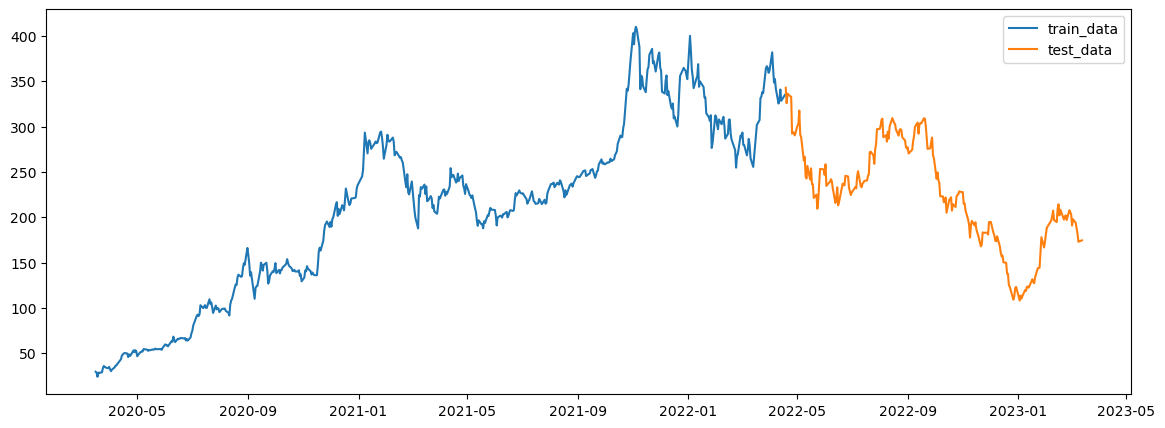

In [7]:
# univarite time series plot

plt.figure(figsize = (14,5))
plt.plot(train, label = 'train_data')
plt.plot(test,label = 'test_data')
plt.legend();

### model training with  auto_arima modules

In [8]:
#building the model
# from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.371, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3812.804, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3814.622, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3814.608, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3812.991, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3816.475, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.050 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

### prediction on train data

In [9]:
# forecasting on test data
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,columns=['Prediction'])
forecast.index = test.index
forecast.head()

C:\Users\Shubham Soni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Prediction
Date,
2022-04-19,335.342258
2022-04-20,335.921180
2022-04-21,336.500103
2022-04-22,337.079025
2022-04-25,337.657947


### prediction on test data

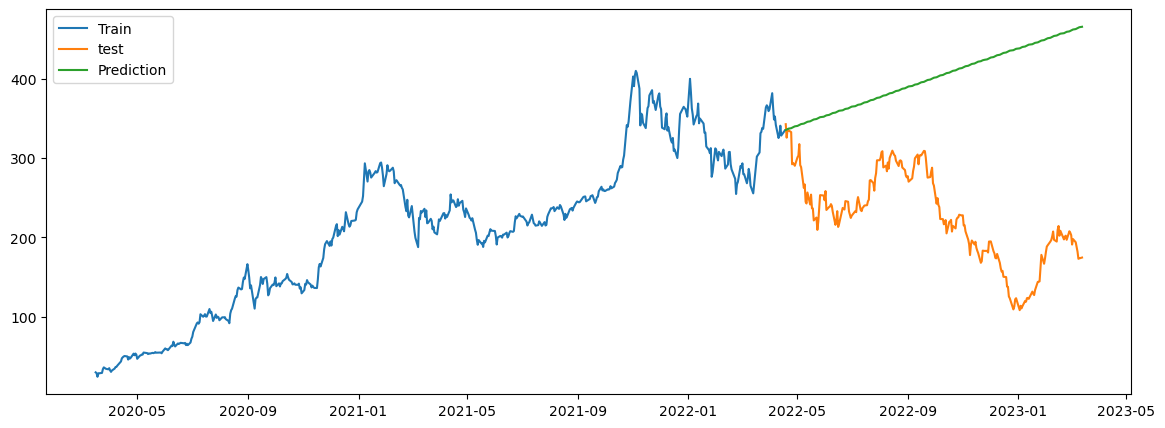

In [10]:
#plot the predictions for test data
plt.figure(figsize = (14,5))
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [11]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print("The root square mean error :",rms)
print("The mean value of  the data: ",data.mean())

The root square mean error : 194.7930063809783
The mean value of  the data:  Close    214.818933
dtype: float64
